<a href="https://colab.research.google.com/github/herculeshamanaka/ds-py-nyc-airbnb/blob/main/Airbnb_Data_Analysis_New_York_City%2C_New_York%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://github.com/herculeshamanaka/data_science/blob/main/img/HerculesH.png?raw=true" width="30%">
</p>

## **1. Airbnb Project**
---

* DSNP 3.0 - Project Module One
* In this notebook we will analyze Airbnb data from New York City and extract some insights from raw data
* The Airbnb file is from January/2022





### **1.1 About Airbnb** <img width="4%" src="https://github.com/herculeshamanaka/ds-py-nyc-airbnb/blob/main/img/airbnb-pngrepo-com.png?raw=true"/> 
---

<center><img alt="Airbnb" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/888_Brannan%2C_San_Francisco%2C_2016.jpg/1200px-888_Brannan%2C_San_Francisco%2C_2016.jpg" /></center>

Airbnb is a shortened version of **AirB**eda**n**d**B**reakfast. It is an American company, based on San Francisco, California, founded in 2008 by **Brian Chesky**, **Nathan Blecharczyk** and **Joe Gebbia**. 

The company offers a service that connects hosts (the property owners) and guests who wants to travel and rent the hosts properties. It is basically an online marketplace for lodging, homestays and tourism activities. 

By 2018 the startup broke the mark of more than 300 millions of lodging around the world, challenging the traditional hotelier market.

On their portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) they offer data of the main cities worldwide. It's possible to download the information to develop project and data science solutions.

### **1.2 New York City** <img alt="I Love NY" width="6%" src="https://github.com/herculeshamanaka/ds-py-nyc-airbnb/blob/main/img/I-Love-New-York-logo.png?raw=true"/> 

---

<img alt="New York City" src="https://www.visiteosusa.com.br/sites/default/files/styles/16_9_1280x720/public/2020-06/79056eb7-3b14-4b2c-9ee6-3c02412dfc97_0.jpeg?h=9b3f26a4&itok=99dR0u79" />


New York City, or NYC for short, is the most populous city in the United States and is located at the southern tip of the State of New York. NYC is one of the world's most populous megacities. It's metropolitan area is the largest in the world by urban area.

NYC has five boroughs - Brooklyn, Queens, Manhattan, Bronx and Staten Island - each of which is coextensive with a respective county of the State of New York. As many as 800 languages are spoken in New York City making it the most linguistically diverse city in the world.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Core_of_New_York_City_by_Sentinel-2.jpg/220px-Core_of_New_York_City_by_Sentinel-2.jpg" width="30%" /> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/5_Boroughs_Labels_New_York_City_Map.svg/220px-5_Boroughs_Labels_New_York_City_Map.svg.png" width="37%" />
</center>

Home to the headquarters of the United Nations, New York City is an important center for international diplomacy. The city also has districts and monuments that are major landmarks, like the Times Square, the Empire State Building, the Wall Street, the Central Park and the Statue of Liberty.

Also know as "The City That Never Sleeps", the NYC Subway has 472 rail stations and provides continuos 24/7 service. The city also has the highest number of billionaries in the world. If the metropolitan area were a sovereign state, it would have the eight-largest economy in the world.


## **2. Data Collection**

---


All the data used in this notebook came from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) portal. At the time this notebook was created the data refers to January/2022.

For this initial exploratory analysis we will download the file below only:

* `listings.csv` - Summary information and metrics for listings in New York City (good for visualizations)


With that in mind, let's start the analysis.

In [ ]:
# importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from IPython.display import Image, display



%matplotlib inline

In [ ]:
# importing New York City listings.csv file to a Dataframe
nyDataFrame = pd.read_csv("https://raw.githubusercontent.com/herculeshamanaka/ds-py-nyc-airbnb/main/data/NYC-2022-listings.csv", 
                          low_memory=False)

## **3. Data Analysis**

---

This step aims to create an initial awareness to allow the first understanding of how the data is structured.

### **3.1 Variables Dictionary**

The table below is sorted by field name. They do <ins>not</ins> come in this order from the csv file.

<br />

| Field Name | Description |
|:------------| :------------|
|`availability_365` | Number of available days within 365 days |
|`calculated_host_listings_count` | Number of listings the host has in the current scrape, in the city/region geography. |
| `host_id`  | Airbnb's unique identifier for the host/user |
| `host_name` | Name of the host. Usually just the first name(s).
| `id`       | Airbnb's unique identifier for the listing|
|`last_review` | The date of the last/newest review |
|`latitude` | Listing World Geodetic System (WGS84) projection for **latitude** |
| `license` | The licence/permit/registration number |
|`longitude` | Listing World Geodetic System (WGS84) projection for **longitude** |
|`minimum_nights` | Minimum number of night stay for the listing (calendar rules may be different) |
| `name`     | Name of the listing
| `neighbourhood_group` | The neighbourhood group as geocoded using the latitude and longitude |
| `neighbourhood` | Listing neighbourhood |
|`number_of_reviews` | The number of reviews the listing has|
| `number_of_reviews_ltm` | The number of reviews the listing has (in the last 12 months) |
|`price` | Daily price in local currency |
|`reviews_per_month` | The number of reviews the listing has over the lifetime of the listing
|`room_type` | Listing type [Entire home/apt \| Private room \| Shared room \| Hotel] |

<br />
<br />

Before any analysis, let's check the first five rows of our dataframe. By doing that we can find out, for example, how date columns are formated or if there are NaN values.

In [ ]:
# displaying first 5 rows of the dataframe
nyDataFrame.head()

id  ... license
0  2595  ...     NaN
1  3831  ...     NaN
2  5121  ...     NaN
3  5136  ...     NaN
4  5178  ...     NaN

[5 rows x 18 columns]

### **3.2 How many atributes (variables) and how many entries the dataset has? Which are the variable types?**

Let's move on and check the dataset entries and variable types.

This dataset contains the Airbnb summarized version data. On the same page where the download was made there is a complete version which the filename is `listings.csv.gz`.

In [ ]:
# checking the DataFrame data volume
print("Entries:\t {}".format(nyDataFrame.shape[0]))
print("Variables:\t {} \n".format(nyDataFrame.shape[1]))

# checking the DataFrame variable types
display(nyDataFrame.dtypes)

Entries:	 38185
Variables:	 18 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **3.3 What is the missing values percentage by variable in the *dataset*?**

The dataset quality is directly related to the quantity of missing values. It's important to check in the initial analysis if the missing values are significant when compared to the amount of entries.

Most of the columns do not have missing values. But it's possible to identify the following:

* the column `license` has almost 100% of missing values
* the columns `reviews_per_month` and `last_review` have almost 25% of missing values
* the column `host_name` has nearly 0,1% of missing values.

In [ ]:
# sort the variables missing values in descending order
(nyDataFrame.isnull().sum() / nyDataFrame.shape[0]).sort_values(ascending=False)

license                           0.999974
reviews_per_month                 0.240304
last_review                       0.240304
host_name                         0.001231
name                              0.000367
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **3.4 What is the numeric variables distribution type?** 

To identify the variables distribution let's plot the histogram.

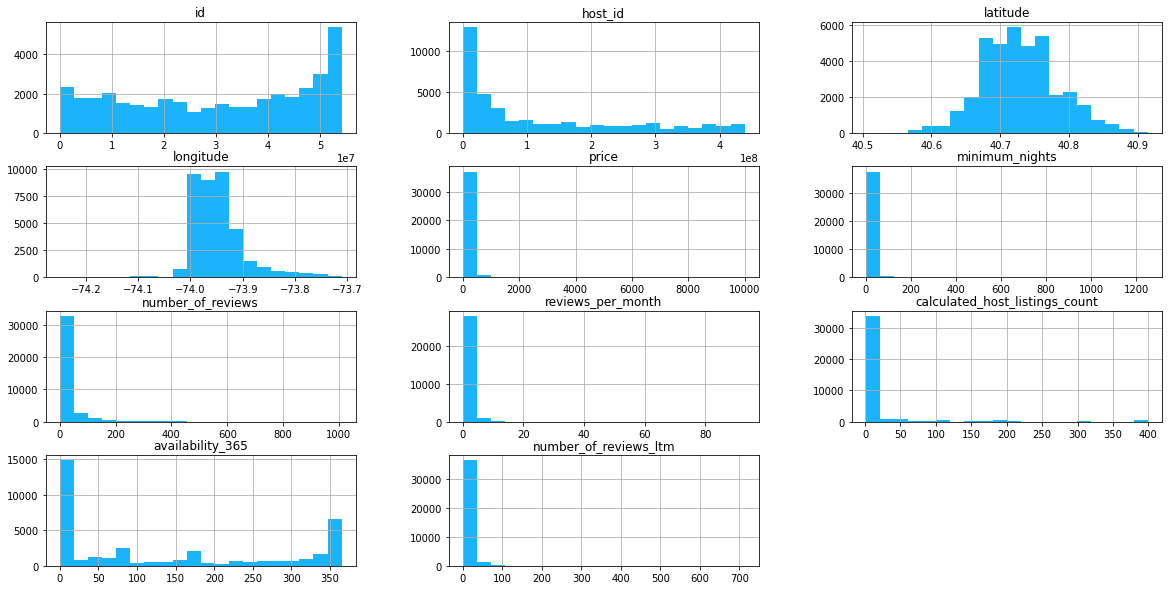

In [ ]:
# ploting the histogram from numeric variables
nyDataFrame.hist(
    bins=20, 
    figsize=(20,10),   
    color="#1bb3fa"
);


### **3.5 There are outliers?**

**Outlier** is an observation point that is distant from other observations. In other words are data points which does not follow the pattern expected in the dataset.

Detecting the outliers is extremely important because they can lead us to take wrong conclusions about our dataset. It's important to remember that we can have `minimum` and `maximum` outliers.

By checking the histogram distribution is possible to indentify the possible presence of outliers in our dataset. Check the variables `price`, `mininum_nights` and `calculated_host_listings_count`.

The values do not follow a regular distribution and distort the graphical representation. There are some ways to detect outliers like:

* IQR Score
* Plot `boxplots` to the variable
* Scatter plots
* Z-Score
* Statistical summary using the `describe()` method

For this dataset we are going to demonstrate the the *statistical summary* using the method `describe()`, `IQR Score` and `boxPlots`.


In [ ]:
# checking the statistical summary for the numeric variables
nyDataFrame[[
  'price', 
  'minimum_nights', 
  'number_of_reviews', 
  'reviews_per_month', 
  'calculated_host_listings_count',             
  'availability_365'
]].describe()

price  ...  availability_365
count  38185.000000  ...      38185.000000
mean     159.285714  ...        139.818672
std      292.483688  ...        145.357261
min        0.000000  ...          0.000000
25%       68.000000  ...          0.000000
50%      109.000000  ...         87.000000
75%      175.000000  ...        304.000000
max    10000.000000  ...        365.000000

[8 rows x 6 columns]



Checking the statistical summary above it's possible to identify some facts like:



* The variable `price` has 75% below USD 180 but the maximum value is USD 10,000.
* The variable `minimum_nights` has some values above 365 days in the year
* The reviews per month (`reviews_per_month`) column has some missing values or not available data

#### 3.5.1 Interquartile Range (IQR) Score for `price` variable

<p align="center">
  <img src="https://github.com/herculeshamanaka/ds-py-nyc-airbnb/blob/main/img/IQR_Score.png?raw=true" width="50%" />
</p>

We are going to implement the following:
* Q1 and Q3 calculation for `price` variable
* Calculate the `price` IQR
* Define the lower and upper limits to clean the outliers
* Remove the outliers

The `pandas` has a `quantile` method to help us calculate the Q1 and Q3.

In [ ]:
# calculating Q1 and Q3 for price variable
priceQ1 = nyDataFrame.price.quantile(.25)
priceQ3 = nyDataFrame.price.quantile(.75)

print('Price Q1: ', priceQ1)
print('Price Q3: ', priceQ3)

# calculating the IQR score
priceIQR = priceQ3 - priceQ1
print('Price IQR: ', priceIQR)

# defining the lower and upper limits
lowerPriceLimit = priceQ3 - (1.5 * priceIQR)
upperPriceLimit = priceQ1 + (1.5 * priceIQR)

print('Price lower limit: ', lowerPriceLimit)
print('Price upper limit: ', upperPriceLimit)


Price Q1:  68.0
Price Q3:  175.0
Price IQR:  107.0
Price lower limit:  14.5
Price upper limit:  228.5


#### **3.5.2 Boxplot to `price` variable**

We will define the threshold for this variable as **USD 228.5** as a result of the calculated upper limit based on the IQR score.

With this threshold we will lose almost 15% of our dataset.

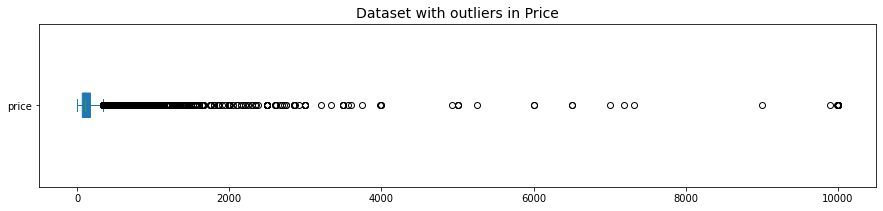


Price: values above U$  228.5
5722 Entries
14.9849%


In [ ]:
fig, axPrice = plt.subplots()

# ploting the boxplot for price
nyDataFrame.price.plot(
    kind='box',
    vert=False,
    notch=True,
    patch_artist=True,
    figsize=(15,3)
)

axPrice.set_title(
    'Dataset with outliers in Price', 
    fontsize=14
)

# displaying the plot
plt.show()

# checking the quantity of values above the upper Price limit
print("\nPrice: values above U$ ", upperPriceLimit)
print("{} Entries".format(len(nyDataFrame[nyDataFrame.price > upperPriceLimit])))
print("{:.4f}%".format((len(nyDataFrame[nyDataFrame.price > upperPriceLimit]) / nyDataFrame.shape[0]) * 100))

#### **3.5.3 IQR Score for `minimum_nights` variable**

Now lets apply the same process we did with the `price` variable for the `minimum_nights`.

In [ ]:
# calculating Q1 and Q3 for minimum_nights variable
minimumNightsQ1 = nyDataFrame.minimum_nights.quantile(.25)
minimumNightsQ3 = nyDataFrame.minimum_nights.quantile(.75)

print('Minimum Nights Q1: ', minimumNightsQ1)
print('Minimum Nights Q3: ', minimumNightsQ3)

# calculating the IQR score
minimumNightsIQR = minimumNightsQ3 - minimumNightsQ1
print('Minimum Nights IQR: ', minimumNightsIQR)

# defining the lower and upper limits
lowerMinimumNightsLimit = minimumNightsQ3 - (1.5 * minimumNightsIQR)
upperMinimumNightsLimit = minimumNightsQ1 + (1.5 * minimumNightsIQR)

print('Minimum Nights lower limit: ', lowerMinimumNightsLimit)
print('Minimum Nights upper limit: ', upperMinimumNightsLimit)

Minimum Nights Q1:  3.0
Minimum Nights Q3:  30.0
Minimum Nights IQR:  27.0
Minimum Nights lower limit:  -10.5
Minimum Nights upper limit:  43.5


#### **3.5.4 Boxplot to `minimum_nights` variable**

We will define the threshold for this variable as **43.5 days** as a result of the calculated upper limit based on the IQR score

With this threshold we will lose 2.6% of the dataset data.

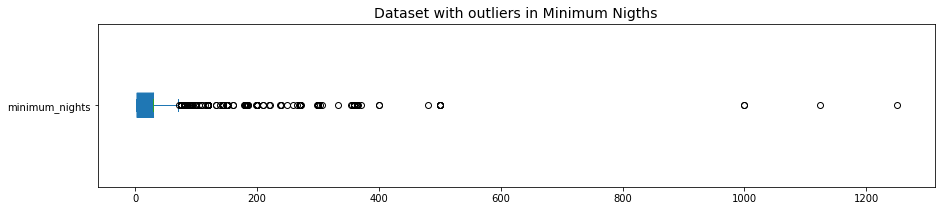


Minimum_Nights: values above 43.5 days
1025 Entries
2.6843%


In [ ]:
fig, axMinimumNights = plt.subplots()

# ploting the boxplot for minimum_nights
nyDataFrame.minimum_nights.plot(
    kind='box',
    vert=False,
    notch=True,
    patch_artist=True,
    figsize=(15,3)
)

axMinimumNights.set_title(
    'Dataset with outliers in Minimum Nigths', 
    fontsize=14
)


# displaying the plot
plt.show()

# checking the quantity above minimum nights upper limit
print("\nMinimum_Nights: values above", upperMinimumNightsLimit, "days")
print("{} Entries".format(len(nyDataFrame[nyDataFrame.minimum_nights > upperMinimumNightsLimit])))
print("{:.4f}%".format((len(nyDataFrame[nyDataFrame.minimum_nights > upperMinimumNightsLimit]) / nyDataFrame.shape[0]) * 100))

#### **3.5.3 Histogram with no outliers**

In this section we will remove the outliers for the variables `price` and `minimum_nights`. 

We will discard `price` higher than U$ 1000 and `minimum_nights` greater than 120 days.

After that we will plot a histogram to check the results. The histograms in blue have outliers and the ones in green don't.

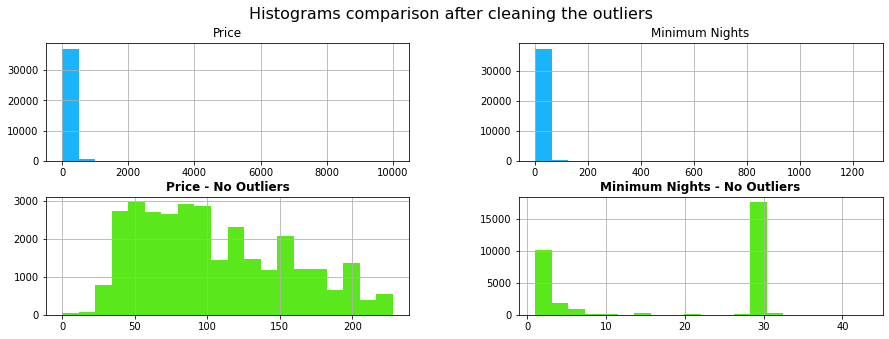

In [ ]:
fig, axes = plt.subplots(
    nrows=2, 
    ncols=2,
    figsize=(15,5)
);

# removing the Outliers in a new dataframe
nyDataFrameCleaned = nyDataFrame.copy()

# removing the prices greater than the price upper limit
nyDataFrameCleaned.drop(
    nyDataFrameCleaned[nyDataFrameCleaned.price > upperPriceLimit].index,
    axis=0,
    inplace=True
)

# removing the minimum nights greater than minimum nights upper limit
nyDataFrameCleaned.drop(
    nyDataFrameCleaned[nyDataFrameCleaned.minimum_nights > upperMinimumNightsLimit].index,
    axis=0,
    inplace=True
)

# ploting the histogram with the Outliers
nyDataFrame.hist(
    column='price',
    bins=20, 
    figsize=(10,7),
    color="#1bb3fa",
    ax=axes[0,0]
);

axes[0,0].set_title(
  'Price'
);

nyDataFrame.hist(
    column='minimum_nights',
    bins=20, 
    figsize=(10,7),
    color="#1bb3fa",
    ax=axes[0,1]
);

axes[0,1].set_title(
  'Minimum Nights'
);

# ploting the histogram with no Outliers
nyDataFrameCleaned.hist(
    column='price',
    bins=20, 
    figsize=(10,7),
    color="#5ae81d",
    ax=axes[1,0]
);

axes[1,0].set_title(
  'Price - No Outliers',
  fontweight='bold'
);

nyDataFrameCleaned.hist(
    column='minimum_nights',
    bins=20, 
    figsize=(10,7),
    color="#5ae81d",
    ax=axes[1,1]
);

axes[1,1].set_title(
  'Minimum Nights - No Outliers',
  fontweight='bold'
);

plt.suptitle(
  'Histograms comparison after cleaning the outliers',
  fontsize=16
);

### **3.6 What are the correlations between variables?**

Correlation means that there is a mutual relationship/connection between two or more things. In this context we are seeking for a relationship between two variables.

This relationship can be measured and the *correlation coefficient* determines the intensity of it.

To identify the existing correlations among the variables of interest, we will:

* Create a correlation matrix
* Generate a heatmap from this matriz using the `seaborn` lib

In [ ]:
# creating a correlation matrix
correlationDataFrame = nyDataFrameCleaned[[
  'price',
  'minimum_nights',
  'number_of_reviews',
  'reviews_per_month',
  'calculated_host_listings_count',
  'availability_365'
]].corr()

# display the correlation matrix
display(correlationDataFrame)




price  ...  availability_365
price                           1.000000  ...          0.031570
minimum_nights                 -0.079950  ...         -0.215296
number_of_reviews               0.021345  ...          0.117461
reviews_per_month               0.031668  ...          0.233299
calculated_host_listings_count -0.098552  ...          0.177522
availability_365                0.031570  ...          1.000000

[6 rows x 6 columns]

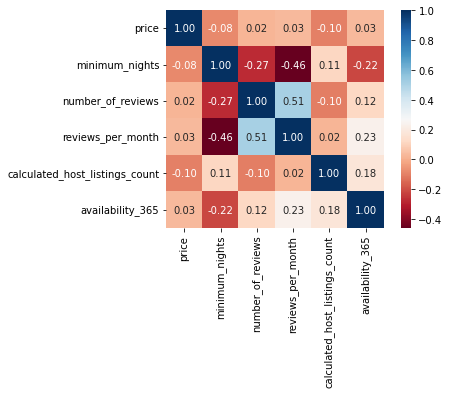

In [ ]:
# ploting a heatmap from the correlation matrix
sns.heatmap(correlationDataFrame,
            cmap='RdBu',
            fmt='.2f',
            square=True,
            linecolor='white',
            annot=True);

### **3.7 What is the most rented room type?**

The variable `room_type` contains the listing type available in Airbnb. You will find homes, private room, shared room among others.

We will count the number of values for each room type, using the method `value_counts()`.

In [ ]:
# display the quantity by room type
nyDataFrameCleaned.room_type.value_counts()


Private room       15847
Entire home/apt    15034
Shared room          524
Hotel room           140
Name: room_type, dtype: int64

In [ ]:
# display the percentage by room type
(nyDataFrameCleaned.room_type.value_counts() / nyDataFrameCleaned.shape[0]) * 100

Private room       50.236171
Entire home/apt    47.658900
Shared room         1.661119
Hotel room          0.443810
Name: room_type, dtype: float64

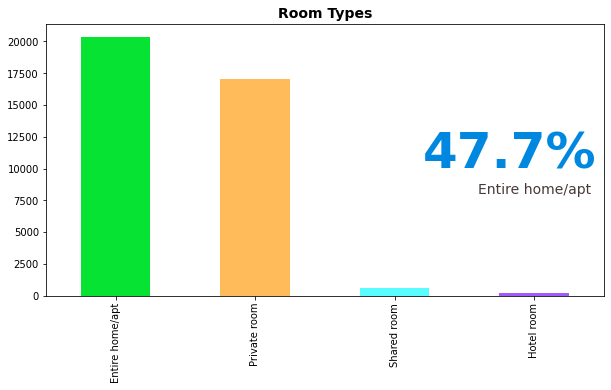

In [ ]:
# modifying chart title
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Room Types', 
              fontsize=14, 
              fontweight='bold'
            )

# adding text to the chart
entireHomeAptPercentage = round((nyDataFrameCleaned[nyDataFrameCleaned.room_type == 'Entire home/apt'].room_type.count() / nyDataFrameCleaned.shape[0]) * 100,1)

ax.text(2.2, 
        10000, 
        str(entireHomeAptPercentage) + '%', 
        fontsize=50,
        fontweight='bold',
        color='#0087df')

ax.text(2.6, 
        8000, 
        'Entire home/apt', 
        fontsize=14,
        color='#493939')

# plot the room type counts
nyDataFrame.room_type.value_counts().plot(kind='bar',
                                          figsize=(10,5),
                                          color=['#07e333',
                                                 '#ffbb59',
                                                 '#59fcff',
                                                 '#a259ff'
                                                ]
                                          );

In [ ]:
# display the percentage of each room type
nyDataFrameCleaned.room_type.value_counts() / nyDataFrameCleaned.shape[0]

Private room       0.502362
Entire home/apt    0.476589
Shared room        0.016611
Hotel room         0.004438
Name: room_type, dtype: float64

### **3.8 Where are the most expensive locations to rent in NYC?**

One of the ways to check a variable depending on other is using the `groupby()` method. For this analysis we want to compare the neighbourhoods rent price.



In [ ]:
# check the mean rent price by neighbourhood (the first 10 recors)
nyDataFrameCleaned.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Breezy Point        176.000000
Gerritsen Beach     174.333333
Belle Harbor        167.166667
Navy Yard           158.000000
West Village        157.015873
NoHo                153.043478
Lighthouse Hill     150.000000
Tribeca             148.254237
DUMBO               148.142857
Theater District    147.742331
Name: price, dtype: float64

Since I never lived or visit NYC I will use the [NewYorkTimes 2021 list](https://www.nytimes.com/2021/10/28/realestate/new-york-citys-most-expensive-neighborhoods.html) of the most expensive neighbourhoods in New York City.

According to this list, locations like `Fort Wadsworth`, `Todt Hill`, `Neponsit`, `Navy Yard` are not considered the most expensive neighbourhoods.

<br />
<p align="center">
  <img src="https://github.com/herculeshamanaka/ds-py-nyc-airbnb/blob/main/img/NYTimes-NYC-Neighbourhoods.png?raw=true" width="30%" />
</p>

Using this list as a initial base, let's find out why `Fort Wadsworth` is being displayed at the top of the list.

In [ ]:
# checking entries for Fort Wadsworth 
nyDataFrameCleaned[nyDataFrameCleaned.neighbourhood == 'Fort Wadsworth']

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license]
Index: []

As we can see it has only one entry with a very high price. 

There are techniques to be used to solve this kind of problem. But we will not apply them in this initial analysis. The idea here is to show that all data must be checked. We can not rely simply on the raw data info.

Now let's plot a *scatter* graph based on price using the latitude and longitude from the listing.

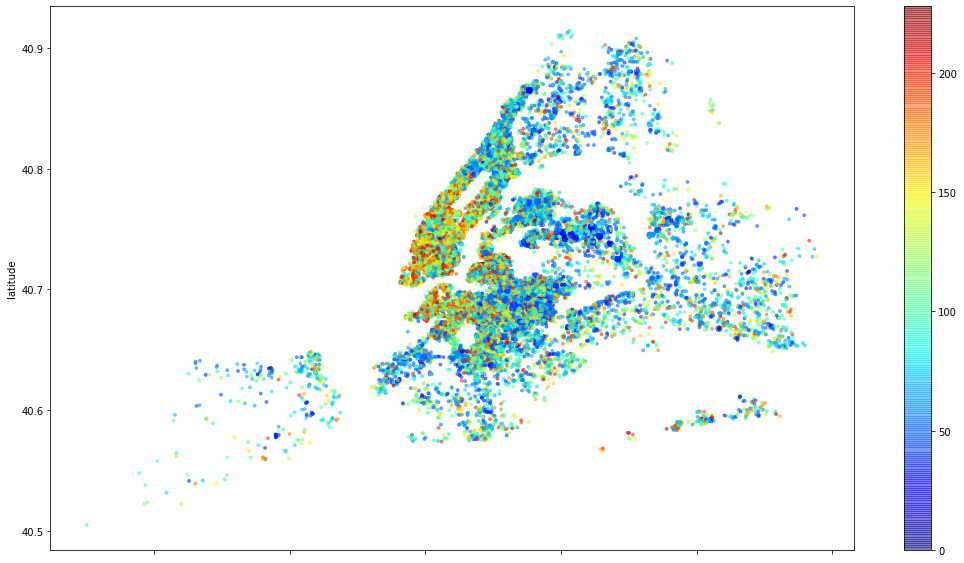

In [ ]:
# plot the listings by latitude-longitude
nyDataFrameCleaned.plot(kind="scatter",
                        x="longitude",
                        y="latitude",
                        alpha=0.5,
                        c=nyDataFrameCleaned['price'],
                        s=8,
                        cmap=plt.get_cmap('jet'),
                        figsize=(18,10)
                       );

It's also possible to plot the same data using a **georeferenced map** using the library `folium`.

In this analysis we will select a specific borough or `neighbourhood_group`. Let's check what are the values we can find.

In [ ]:
# checking the neighbourhood_group variable values
nyDataFrameCleaned.neighbourhood_group.value_counts()

Brooklyn         12684
Manhattan        12560
Queens            4941
Bronx             1052
Staten Island      308
Name: neighbourhood_group, dtype: int64

Now we create a dataframe for the selected borough, in this case `Staten Island`. This borough was selected because it has less records and it's easier to demonstrate the markers.

If you click on a marker it will display the listing price.

In [ ]:
nyDataFrameBorough = nyDataFrameCleaned[nyDataFrameCleaned.neighbourhood_group == 'Staten Island']

# Initilizing the map focusing in NYC
nycBoroughMap = folium.Map(location=[40.579021, -74.151535], 
                           zoom_start=12, 
                           tiles='cartodb positron')

neighbourhood = nyDataFrameBorough.neighbourhood.values
latitude = nyDataFrameBorough.latitude.values
longitude = nyDataFrameBorough.longitude.values
price = nyDataFrameBorough.price.values

mapData = {
    'neighbourhood': neighbourhood,
    'latitude': latitude,
    'longitude': longitude,
    'price': price
}

# using a different color to the marker depending on the price
for listing in range(0, nyDataFrameBorough.shape[0]):
  if mapData['price'][listing] <= 100:
    priceColor = '#5bdf00' # green
  elif mapData['price'][listing] <= 200:
    priceColor = '#1274fa' # blue
  elif mapData['price'][listing] <= 300:
    priceColor = '#fa12f3' # pink
  else:
    priceColor = '#ff4034' # red
  
# simple HTML popup
  popHTML = "<strong>Price: </strong>" + str(mapData['price'][listing])

# adding the 
  folium.CircleMarker(location=[mapData['latitude'][listing], mapData['longitude'][listing]],
                      radius=2,
                      color=priceColor,
                      line_color=priceColor,
                      line_weigth=2,
                      fill_color=priceColor,
                      fill=True,
                      popup=popHTML
                     ).add_to(nycBoroughMap)

# displaying the borough map
nycBoroughMap

Now let's create a choropleth map. The file used to make the neighbourhood boundaries was extracted from [NYC Open Data](https://data.cityofnewyork.us/City-Government/2010-Neighborhood-Tabulation-Areas-NTAs-/cpf4-rkhq). This is a web site which contains open data for analysis from business, city government, education among others.

The choropleth map will give us a general overview on the neighbourhood prices. We will use the YellowOrangeRed colormap. Yellow refers to the lowests prices and red the highests prices.

In [ ]:
# creating the Choropleth map
nyChoroplethMap = folium.Map(location=[40.730610, -73.935242], 
                             zoom_start=10.5,
                             tiles="cartodb positron")

# reading the json file which contains the neighbourhood boundaries
neighbourhoodGeo = f"https://raw.githubusercontent.com/herculeshamanaka/ds-py-nyc-airbnb/main/data/2020 Neighborhood Tabulation Areas (NTAs) - Tabular.geojson"

# using the Choropleth class and adding it to the map
folium.Choropleth(geo_data=neighbourhoodGeo,
                  data=nyDataFrameCleaned,
                  columns=["neighbourhood", "price"],
                  key_on="properties.ntaname",
                  legend_name="Price values",
                  fill_color="YlOrRd",
                  highlight=True,
                  line_opacity=0.2,
                  line_weight=1,
                  nan_fill_color="#a49bff",
                  nan_fill_opacity=0.4,
                  zoom_on_click=True,
                  name="Neighbourhood Prices"
                 ).add_to(nyChoroplethMap)

# adding a Layer Contol to the map
folium.LayerControl().add_to(nyChoroplethMap)

# displaying the map
nyChoroplethMap

The `ligth blue` areas are neighbourhoods with no listings. It was also possible to identify the `Fort Wadsworth` neighbourhood with the U$ 800 price.

### **3.9 What is the mean of minimum nights for rent (`minimum_nights`)**

In [ ]:
# ver a média da coluna `minimum_nights``
nyDataFrameCleaned.minimum_nights.mean()

18.466508162941828

## **4. Conclusions**
---

This was only an initial analysis on the NYC Airbnb raw data but we already could identify outliers for some variables.

It was also possible to identify some neighbourhoods which have few listings available and the impact of it on our statistical information (like the most expensive neighbourhood mean price).

By using the choropleth map we had a general overview about the neighbourhood prices. It also showed us that there is a significant number of neighbourhood with no listings.

The correlation between the variables are mostly negative. 

The dataset used contains a sumarized version of the listings. This is ideal only for a initial analysis. It's recommeded, in the case of an exploratory analysis, the full available dataset with all atributes availables.
